In [1]:
import random 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

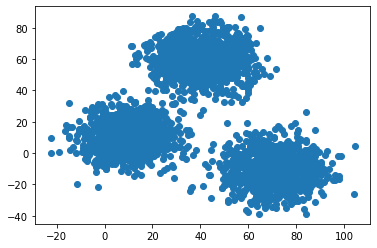

In [2]:
#data=pd.read_csv('example1.csv')
data=pd.read_csv('xclara.csv')

data=data.values.tolist()
data=np.array(data)


'''
# Set three centers, the model should predict similar results
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

# Generate random data and center it to the three centers
data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7)
'''

plt.scatter(data[:,0],data[:,1])
plt.show()

In [247]:
#k-mean

#chose randoomly k centres

def eucliad_dist(p1,p2):
    return np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)
def centroid(group):
    length=len(group)
    sum_x=sum(val[0] for val in group)
    sum_y=sum(val[1] for val in group)
    return sum_x/length,sum_y/length

def within_cluster_variation(cluster, mean):
    return sum([eucliad_dist(val,mean) for val in cluster])

def kmeanPP_initilization(data,k):
    centroid_list=[]
    #chose a random point
    
    c=random.sample(list(data),1)
    c=c[0].tolist()
    centroid_list.append( c ) 
    if k==1:
         
        return centroid_list
    else:
        new_data=list(data)
        new_data=[item for item in new_data if (item !=c).all()]
        for i in range(k-1):
            avg_dist=[-1]*len(new_data)
            for j,data in enumerate(new_data):
                avg_dist[j]=sum([ eucliad_dist(item,data) for item in centroid_list ])/len(centroid_list)
            max_dist=max(avg_dist)
            index=[ i for i,val in enumerate(avg_dist) if avg_dist[i]==max_dist]
            #print(type(index))
            new_centroid=new_data[index[0]].tolist()            
            centroid_list.append(new_centroid)
            new_data=[item for item in new_data if (item!= new_centroid).all()] 
    return centroid_list

In [195]:
#d=kmeanPP_initilization(data,3)


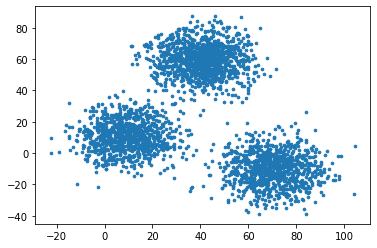

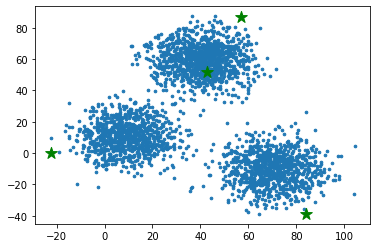

In [248]:

J_=[]
for k in range(1,5):
    
    #initialization 0
    #c=np.random.randn(k,2)*np.std(data)+np.mean(data)
    
    #initalization 1
    #c=random.sample(data.tolist(),k)
    #c=np.array(c)
    
    f1.clear()
    plt.close(f1)
    f2.clear()
    plt.close(f2)
    # Plot the data and the centers generated as random
    
    f1=plt.figure(0)
    plt.scatter(data[:,0], data[:,1], s=7)
    #plt.scatter(c[:,0], c[:,1], marker='*', c='g', s=150)
    
    f2=plt.figure(1)
    c=kmeanPP_initilization(data,k)    
    c=np.array(c)    
    #print(c)
    plt.scatter(data[:,0], data[:,1], s=7)
    plt.scatter(c[:,0], c[:,1], marker='*', c='g', s=150)
    
    #print(c)
    
    #cluster_index=[]
    cluster_index_old=[-1]*len(data)
    cluster_index=[-2]*len(data)
    #print(cluster_index_old)
    #print(cluster_index)
    while cluster_index_old != cluster_index:
        cluster_index_old=cluster_index[:]
        new_data_group=[ [] for i in range(len(c))]
        #cluster assignmnet
        for i,val  in enumerate(data):
            new_cluster=np.argmin([ eucliad_dist(centre,val) for centre in c])
            cluster_index[i]=new_cluster
            new_data_group[new_cluster].append(val)
        #move centroid 
        for i in range(len(c)):
            c[i]=centroid(new_data_group[i])
        #print(c)
        #calculated distortion function_j = the objective function is defined as ∑ki=1 to K (∑x∈Di||x−μi||2 ) )
        J=0
        for i in range(len(new_data_group)):
           J =J+ within_cluster_variation(new_data_group[i],c[i])
    J_.append([k,J])
    
    

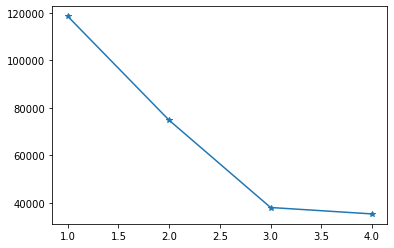

In [249]:
new_data_group[i]
J_=np.array(J_)
plt.plot(J_[:,0],J_[:,1],marker='*')

In [250]:
c

array([[ 31.78831061,  59.67227949],
       [ 69.92418447, -10.11964119],
       [  9.43391214,  10.63898036],
       [ 48.13340973,  59.66325939]])

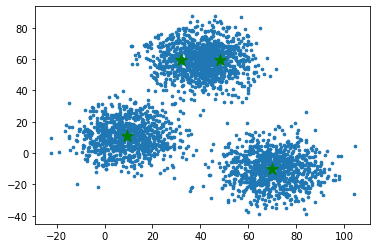

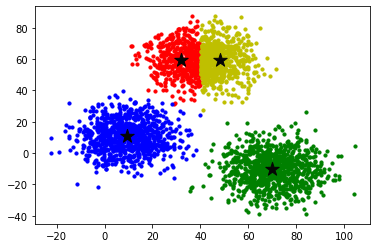

In [251]:
# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(c[:,0], c[:,1], marker='*', c='g', s=150)

colors = ['r', 'g', 'b', 'y', 'c', 'm','g0']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if cluster_index[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=10, c=colors[i] )
ax.scatter(c[:, 0], c[:, 1], marker='*', s=200, c='#050505')

In [252]:
from sklearn.cluster import KMeans
import numpy as np
X = data
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
kmeans.labels_
kmeans.predict(data)
c2=kmeans.cluster_centers_

In [253]:
c2

array([[ 69.92418447, -10.11964119],
       [ 48.38980073,  59.93652114],
       [  9.43391214,  10.63898036],
       [ 32.10293593,  59.36915905]])